**Deskripsi Tugas:**

Anda diminta untuk menganalisis data waktu pengiriman untuk menemukan pola yang mungkin menunjukkan adanya masalah atau area yang perlu ditingkatkan. Data yang diberikan meliputi waktu pengiriman (dalam jam) dari berbagai cabang selama sebulan terakhir.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from library_run import csv, scatterplot, boxplot

In [15]:
data = pd.read_csv("Data/data_pengiriman_dengan_transportasi.csv")

In [16]:
# melihat 5 data teratas
data.head()

,ID Pengiriman,Cabang Asal,Cabang Tujuan,Tanggal Pengiriman,Waktu Pengiriman (jam),Jenis Transportasi
0,1,Jakarta,Surabaya,2024-08-01,10,Kereta Api
1,2,Bandung,Medan,2024-08-02,8,Pesawat
2,3,Surabaya,Bandung,2024-08-03,20,Kereta Api
3,4,Medan,Jakarta,2024-08-04,18,Kapal
4,5,Jakarta,Surabaya,2024-08-05,15,Kapal


## Preprocessing data

In [17]:
date = data['Tanggal Pengiriman']
datetime = pd.to_datetime(date)

# membuat kolom baru yang dari data tanggal yang terdiri dari hari, bulanm tahun, dan musim
data['Tanggal Kirim'] = datetime.dt.day
data['Bulan Kirim'] = datetime.dt.month
data['Hari Kirim'] = datetime.dt.year

In [18]:
data.head()

,ID Pengiriman,Cabang Asal,Cabang Tujuan,Tanggal Pengiriman,Waktu Pengiriman (jam),Jenis Transportasi,Tanggal Kirim,Bulan Kirim,Hari Kirim
0,1,Jakarta,Surabaya,2024-08-01,10,Kereta Api,1,8,2024
1,2,Bandung,Medan,2024-08-02,8,Pesawat,2,8,2024
2,3,Surabaya,Bandung,2024-08-03,20,Kereta Api,3,8,2024
3,4,Medan,Jakarta,2024-08-04,18,Kapal,4,8,2024
4,5,Jakarta,Surabaya,2024-08-05,15,Kapal,5,8,2024


In [19]:
# melihat data uniq
data["Cabang Asal"].unique()

array(['Jakarta', 'Bandung', 'Surabaya', 'Medan'], dtype=object)

In [20]:
# melihat data uniq
data["Cabang Tujuan"].unique()

array(['Surabaya', 'Medan', 'Bandung', 'Jakarta'], dtype=object)

In [21]:
# mengambil kolom yang dibutuhkan
df=data[['Cabang Asal', 'Cabang Tujuan', 'Tanggal Kirim', 'Bulan Kirim','Jenis Transportasi','Waktu Pengiriman (jam)']]

In [22]:
df.head()

,Cabang Asal,Cabang Tujuan,Tanggal Kirim,Bulan Kirim,Jenis Transportasi,Waktu Pengiriman (jam)
0,Jakarta,Surabaya,1,8,Kereta Api,10
1,Bandung,Medan,2,8,Pesawat,8
2,Surabaya,Bandung,3,8,Kereta Api,20
3,Medan,Jakarta,4,8,Kapal,18
4,Jakarta,Surabaya,5,8,Kapal,15


## Analisis Data

In [23]:
df.describe()

,Tanggal Kirim,Bulan Kirim,Waktu Pengiriman (jam)
count,100.000000,100.00000,100.000000
mean,14.930000,9.16000,14.600000
std,9.101288,0.96106,5.974694
min,1.000000,8.00000,5.000000
25%,7.000000,8.00000,9.750000
50%,14.500000,9.00000,14.500000
75%,23.000000,10.00000,20.000000
max,31.000000,11.00000,24.000000


**Noted**
Untuk waktu pengiriman sendiri memeliki rentang waktu 14 jam, dan waktu pengiriman tercepat adalah 6 jam, selain itu untuk waktu paling lama melakukan proses pengiriman sendiri adalah 20 jam. untuk bulan pengiriman paling banyak dilakukan pada bulan 9 atau bulan september.

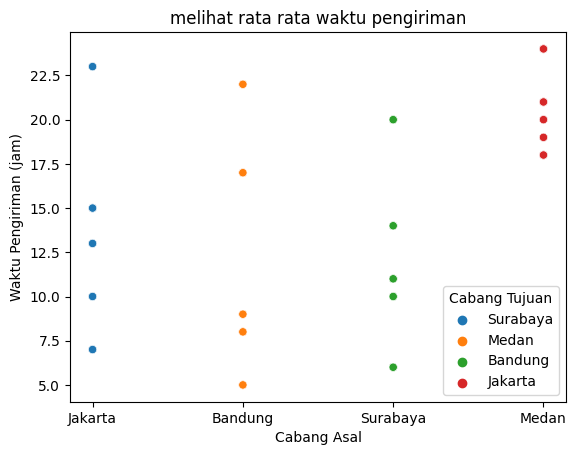

In [24]:
#  Melakukan analisis berdasarkan waktu pengiriman dari cabang asal ke cabang tujuan
scatterplot(df,'Cabang Asal', 'Waktu Pengiriman (jam)', 'Cabang Tujuan', "melihat rata rata waktu pengiriman")

**Noted**
Dari hasil analisis untuk rute pengiriman jakarta-surabaya waktu paling cepat ditempuh adalah 7 jam, sedangkan untuk rute bandung-medan waktu tercepat melakukan pengiriman adalah 5 jam, untuk surabaya-bandung waktu tercepat adalah 6 jam, sedangkan untuk medan jakarta menghabiskan waktu 18jam

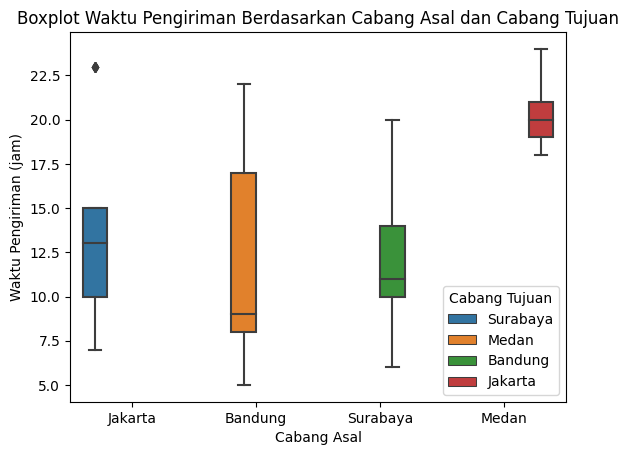

In [25]:
# Melakukan analisis berdasarkan waktu pengiriman dari cabang asal ke cabang tujuan
boxplot (df, 'Cabang Asal', 'Waktu Pengiriman (jam)', 'Cabang Tujuan', 'Boxplot Waktu Pengiriman Berdasarkan Cabang Asal dan Cabang Tujuan')


**Noted Jakarta-Surabaya**

dari hasil visualisasi terlihat sebuah permasalahan yang terjadi dimana terdapat pada pengiriman jakarta-surabaya yang waktu pengirimannya mencapai 23 jam, hal tersebut tidaklah wajar terjadi. selain itu rata rata waktu pengirima nberkisar antara 10-13 jam, untuk waktu tercepat sendiri adalah 7 jam.

**Noted Bandung-Medan**

dari hasil analisis waktu tercepat dibuthkan untuk melakukan pengiriman barang adalah 5 jam. sedangkan rata-rata waktu yang dibutuhkan untuk melakukan pengiriman berkisar antara 8-17 jam.

**Noted Surabaya-Bandung**

dari hasil analisis waktu tercepat dibuthkan untuk melakukan pengiriman barang adalah 6 jam. sedangkan rata-rata waktu yang dibutuhkan untuk melakukan pengiriman berkisar antara 11-14 jam.

**Noted Medan-Jakarta**

dari hasil analisis waktu tercepat dibuthkan untuk melakukan pengiriman barang adalah 18 jam. sedangkan rata-rata waktu yang dibutuhkan untuk melakukan pengiriman berkisar antara 19-21 jam.

In [26]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Buat boxplot untuk 'Waktu Pengiriman (jam)' berdasarkan 'Jenis Transportasi'
# ax = sns.boxplot(data=df, x='Jenis Transportasi', y='Waktu Pengiriman (jam)')

# # Menghitung median untuk setiap jenis transportasi
# medians = df.groupby('Jenis Transportasi')['Waktu Pengiriman (jam)'].median()

# # Menambahkan garis median dengan library
# for i, median in enumerate(medians):
#     ax.plot([i - 0.2, i + 0.2], [median, median], color='red', linestyle='-', lw=2, label='Median' if i == 0 else "")

# # Menambahkan judul dan label
# plt.title('Boxplot Waktu Pengiriman Berdasarkan Jenis Transportasi')
# plt.xlabel('Jenis Transportasi')
# plt.ylabel('Waktu Pengiriman (jam)')

# # Menampilkan legenda (hanya satu label 'Median')
# handles, labels = ax.get_legend_handles_labels()
# if handles:
#     plt.legend(handles[:1], labels[:1])

# # Menampilkan plot
# plt.show()

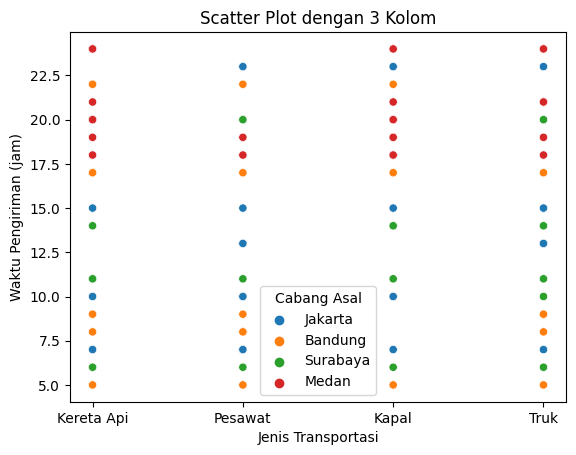

In [29]:
# Melakukan analisis berdasarkan waktu pengiriman dari cabang asal ke cabang tujuan
sns.scatterplot(data=df, x='Jenis Transportasi', y='Waktu Pengiriman (jam)', hue='Cabang Asal')
plt.title('Scatter Plot dengan 3 Kolom')
plt.show()

**Noted**

Dari hasil visualisasi dapat disimpulkan bahwa pengiriman dari cabang jakarta jenis tranportasi paling efektif adalah kereta api dimana berkisar antara 7-14 jam. sedangkan untuk pengiriman asal bandung tranportasi paling efekti digunakan adalah Truk dengan estimasi waktu 5-17 jam. pengiriman surabaya waktu tranportasi paling efektif yang digunakan adalah kapal dan kereta api dengan estimasi waktu 6-14 jam. sedangkan untuk pengiriman dari medan tranportasi paling efekti digunakan adalah Pesawat dengan estimasi waktu 18-19 jam. 

## Hasil Analisi/Kesimpulan

dari hasil analisis terdapat permasalahan dalam melakukan pengiriman dari jakarta dengan menggunakan jenis transportasi pesawat, kapal, dan truk untuk waktu untuk tranportasi paling efektif digunakan adalah kereta api dimana waktu tercepat dengan menggunakan kereta api adalah 7 jam dan waktu terlama menggunakan kereta api ialah 14 jam. Untuk pengiriman melalui Bandung tidak efektif jika menggunakan jenis tranportasi kereta api, pesawat, dan kapal karena estimasi waktu pengiriman bisa mencapai 22 jam maka dari itu tranportasi yang digunakan adalah Truk dengan estimasi waktu 5-17 jam. Pengiriman melalui surabaya tidak efektif jika menggunakan tranportasi pesawat dan truk karena estimasi bisa mencapai 20 jam. sedangkan untuk pengiriman melalui Medan transportasi paling efektif adalah pesawat dengan estimasi waktu 18-19 jam. 

In [28]:
# df[df['Cabang Asal'] == 'Medan'][['Cabang Asal','Cabang Tujuan', 'Tanggal Kirim', 'Bulan Kirim','Jenis Transportasi', 'Waktu Pengiriman (jam)']].head(50)